# SAtellite differences

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import os
from glob import glob

import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

import histlib.matchup as match
import histlib.diagnosis as diag
from histlib.cstes import labels, zarr_dir, matchup_dir, var
from histlib.matchup import _data_var, _stress_var, _aviso_var

/home1/datahome/mdemol/.miniconda3/envs/histenv2/lib/python3.9/site-packages/dask/config.py:742: FutureWarning: Dask configuration key 'distributed.scheduler.transition-log-length' has been deprecated; please use 'distributed.admin.low-level-log-length' instead
  warnings.warn(
/home1/datahome/mdemol/.miniconda3/envs/histenv2/lib/python3.9/site-packages/dask/config.py:742: FutureWarning: Dask configuration key 'distributed.comm.recent-messages-log-length' has been deprecated; please use 'distributed.admin.low-level-log-length' instead
  warnings.warn(


In [2]:
DL =25*1e3 #meters
DT = 0.5*3600 #seconds
id_aviso = 'aviso__25__adt__es_cstrio_z15__drifter_x'
id_co = 'co__25__adt_filtered_ocean_tide_internal_tide__es_cstrio_z15__drifter_x'

In [3]:
def global_ms_drifter_sat_year(dsms):
    ds = (((dsms*dsms.nb_coloc).sum('drifter_sat_year'))/(dsms.nb_coloc.sum('drifter_sat_year'))).drop('nb_coloc')
    print(dsms.nb_coloc.sum('drifter_sat_year'))
    for v in dsms.keys():
        if v != 'nb_coloc':
            ds[v].attrs=dsms[v].attrs
    return ds

def put_fig_letter(ax, letter):
    trans = mtransforms.ScaledTranslation(10/72, -5/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, letter+')', transform=ax.transAxes+trans,
            fontsize='medium', verticalalignment='top', fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))

In [4]:
def get_drifter_sat_year_from_label(l):
    L = l.split('_')
    if 'Sentinel' in l:
        return [L[0], L[1]+'_'+L[2], L[-1]]
    else :
        return L

In [9]:
Ls = np.unique([get_drifter_sat_year_from_label(l)[1] for l in labels])

In [10]:
Ls

array(['Cryosat-2', 'Jason-2', 'Jason-3', 'SARAL', 'Sentinel-3_A',
       'Sentinel-3_B'], dtype='<U12')

# Datasets 

In [13]:
dsd = xr.open_dataset(os.path.join(zarr_dir+'_ok','global', f'ms_{int(DL//1000)}_{DT}_drogued.zarr'))
Ls = np.unique([get_drifter_sat_year_from_label(l)[1] for l in labels])
dic_sat = {ls :[l for l in dsd.drifter_sat_year.values if ls in l] for ls in Ls}
DS_sat = {ls : global_ms_drifter_sat_year(dsd.sel(drifter_sat_year=dic_sat[ls])).persist() for ls in Ls}

<xarray.DataArray 'nb_coloc' ()>
array(65445)
<xarray.DataArray 'nb_coloc' ()>
array(44373)
<xarray.DataArray 'nb_coloc' ()>
array(27620)
<xarray.DataArray 'nb_coloc' ()>
array(52322)
<xarray.DataArray 'nb_coloc' ()>
array(38763)
<xarray.DataArray 'nb_coloc' ()>
array(9337)


[Text(0, 0, 'Cryosat-2'),
 Text(1, 0, 'Jason-2'),
 Text(2, 0, 'Jason-3'),
 Text(3, 0, 'SARAL'),
 Text(4, 0, 'Sentinel-3_A'),
 Text(5, 0, 'Sentinel-3_B')]

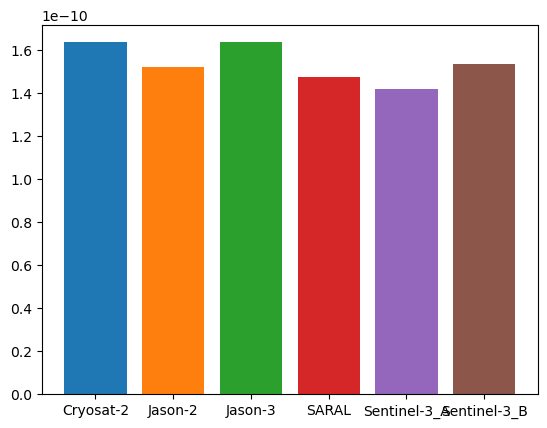

In [24]:
fig, ax = plt.subplots(1,1)
for i in range(len(Ls)):
    ax.bar(i, DS_sat[Ls[i]]['sum_'+id_co])
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(Ls)